# Hack-Night Kick-off

Boilerplate code which sets python up with the functionality we need.

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
%matplotlib inline

sns.set_style('dark')

A couple of convenience variables: the version of the data we want to use.

In [2]:
tag      =  '20180920'

The directory which holds our data files.

In [3]:
plot_dir  =  '.'

Read in the table containing the average per FoodAisle...

In [4]:
eaten_table_aisle  =  pd.read_csv (plot_dir + '/eaten_table_aisle_' + tag +'.csv')
eaten  =  pd.read_csv (plot_dir + '/eaten_table_' + tag + '.csv')
eaten_table_aisle

/Users/joefennell/anaconda/envs/spy2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Units,FoodAisle,Base,ACAR,ALCO,BCAR,BCRYPT,BIOT,CA,CHO,...,CannedTuna,Shellfish,CottageCheese,CheddarCheese,OtherCheese,AllCheese,AllFish,AllMeat,AllAnimal,CO2e
0,Grams,"Cakes, biscuits, puddings",44.045365,0.405216,0.005461,17.172574,0.114384,1.743375,40.166785,22.850325,...,0.000000,0.000000,0.000000,0.013762,0.354482,0.368244,0.000000,0.000000,0.368244,114.599390
1,Grams,"Bread, pasta, cereal",202.114147,1.035035,0.000000,63.685713,5.718179,6.033314,239.628352,92.615903,...,0.145956,0.054233,0.000000,1.123000,2.473457,3.596456,0.200189,1.456386,5.253031,536.106595
2,Grams,Cheese and butter,37.266741,5.449525,0.000000,107.180680,0.000000,0.796270,134.485162,0.257816,...,0.000000,0.000000,0.828062,13.309979,5.989137,20.127178,0.000000,0.000000,20.127178,330.965934
3,Grams,Eggs,25.342423,0.022221,0.000000,2.655244,0.054586,4.208647,15.479753,0.548095,...,0.000000,0.000000,0.000000,0.097952,0.093400,0.191352,0.000000,0.190583,0.381935,124.297159
4,Grams,Other drinks,3.566354,0.000000,0.000000,0.580809,0.000000,0.404485,6.056473,1.657836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.482666
5,Grams,"Sugar, sweets",16.596091,0.000000,0.000000,0.804314,0.022597,0.008489,2.207760,15.900452,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.578954
6,Grams,Chicken and turkey,54.928844,3.315382,0.000000,29.561160,1.783498,1.240495,10.724812,2.354561,...,0.000000,0.000000,0.000000,0.022056,0.043151,0.065208,0.000000,43.171479,43.236687,279.939333
7,Grams,"Fruit, fruit juice",167.385916,9.085366,0.000000,62.103108,32.979115,2.241464,19.547913,20.806507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,239.777228
8,Grams,Cooked vegetables,138.973886,466.049493,0.000000,1860.092017,62.744487,1.995844,36.068091,7.662417,...,0.000000,0.000000,0.000000,0.094918,0.044593,0.139511,0.000000,0.118268,0.257779,276.076580
9,Grams,"Savoury sauces, pickles, gravies & condiments",40.405383,2.808908,0.000000,120.158759,6.122978,0.744066,18.279696,5.353426,...,0.000000,0.001343,0.000000,0.021052,0.186962,0.208015,0.019053,0.120819,0.347886,122.415628


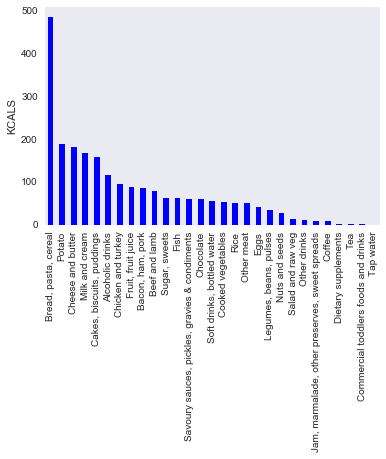

In [5]:
colname = 'KCALS'

# sort table
eaten_table_aisle = eaten_table_aisle.sort_values(colname,ascending=False)

# plot
ax = eaten_table_aisle[colname].plot(kind='bar',color='blue')
ax.set_ylabel(colname)

# label
ax.set_xticklabels(np.array(eaten_table_aisle['FoodAisle'],dtype=str))
plt.show()

# CO2e by age?

I was interested to understand if different age categories had different environmental impacts.

I averaged over number of individuals in the cohort, and calculated this per day, in order to compensate for any age cohort-specific effect of missing days.

In [6]:
eaten['age_cat'] = pd.cut(eaten['Age'], 5)

# group by participant and sum co2e of food intake
#
by_participant = eaten.groupby(['seriali','age_cat','DayNo']).sum()
day_mean_by_age_cat =  by_participant.groupby(['age_cat']).mean()['CO2e']
day_mean_by_age_cat

age_cat
(18.955, 28.0]    5181.941972
(28.0, 37.0]      5089.655060
(37.0, 46.0]      5022.947375
(46.0, 55.0]      5102.926757
(55.0, 64.0]      5238.895225
Name: CO2e, dtype: float64

In [7]:
mean_per_day_CO2e = eaten.groupby(['seriali','DayNo'])['CO2e'].sum().mean()

In [8]:
meanDiff = day_mean_by_age_cat - mean_per_day_CO2e

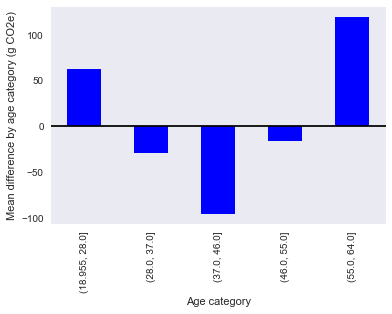

In [9]:
ax = meanDiff.plot(kind='bar',color='blue')
#ax.set_ylim((5000,4400))
ax.set_ylabel('Mean difference by age category (g CO2e)')
ax.set_xlabel('Age category')
ax.hlines(y=0,xmin=-.5,xmax=4.5)
plt.show()

# Non-Linear Clustering Example

I wanted to know which foods were nutritionally similar, so decided to represent this using an isomapped projection- a tool for representing high dimensional data in a 2D space.


In [10]:
# first retrieve appropriate features

nutritional_vals = ['ACAR', 'BCAR', 'BCRYPT', 'BIOT', 'CA',
       'CHO', 'CHOL', 'CL', 'CMON', 'CN3', 'CN6', 'CU', 'ENGFIB', 'FAT', 'FE',
       'FOLT', 'FRUCT', 'GLUC', 'HFE', 'I', 'K', 'LACT', 'MALT','KCALS',
       'MG', 'MN', 'NA', 'NCF', 'NHFE', 'NIACEQU', 'NMILK', 'OSUG',
       'P', 'PANTO', 'PROT', 'RET', 'RIBO', 'SATFA', 'SE', 'STAR', 'SUCR',
       'THIA', 'TOTCAR', 'TOTNIT', 'TOTSUG', 'TRANS', 'VITA', 'VITB12',
       'VITB6', 'VITC', 'VITD', 'VITE', 'ZN','WATER']

label = eaten_table_aisle['FoodAisle'].values
X1 = eaten_table_aisle[nutritional_vals]



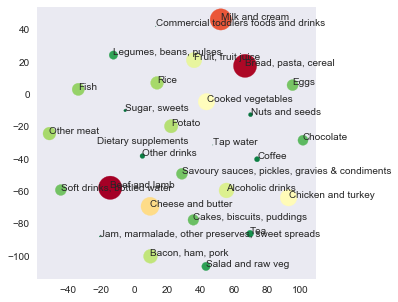

In [11]:
from sklearn.manifold import LocallyLinearEmbedding,TSNE
import sklearn.preprocessing as pre

Y1 = TSNE(n_components=2).fit_transform(pre.RobustScaler().fit_transform(X1))

# plot
plt.figure(figsize = (5,5))
plt.scatter(Y1[:,0],Y1[:,1],
            c=eaten_table_aisle['CO2e'],
            cmap='RdYlGn_r',
            s=eaten_table_aisle['CO2e'])
for i, lab in enumerate(label):
    plt.text(Y1[i,0],Y1[i,1],lab)
plt.show()

Lets apply the same thing to the whole food dataset:


In [12]:
foods  =  pd.read_csv (plot_dir + '/foods_table_' + tag + '.csv',dtype='str')

# get rid of na rows for now
foods = foods.dropna(axis=0,how='any')

# new dataset has some empties so set to 0

def recodeEmpty(foods_table):
    foods_table[foods_table==' ']=0
    return

recodeEmpty(foods)

In [13]:
# make a label column vector
#label2 = foods['FoodName'].values

# using our list of desired features, extract 2d (obs by feature) array and scale
X2 = pre.RobustScaler().fit_transform(foods[nutritional_vals])

In [14]:
from sklearn import manifold

# we'd expect about 30 classes, so set to 35
#Y = manifold.LocallyLinearEmbedding(n_neighbors=40,n_components=4,max_iter=10000).fit_transform(X2)

# TSNE seems to be less ridiculous than LLE
Y2 = manifold.TSNE().fit_transform(X2)

In [15]:
from scipy.spatial.distance import cdist

def find_nearest_foods(X,tabPosition,foodsTable):
    distX = cdist(X,X)
    leng = distX.shape[0]
    vec = distX[tabPosition,:int(leng/2)]
    orderedVec = np.argsort(vec)
    oNs = np.array(foodsTable['FoodName'])[orderedVec]
    co2e = np.array(foodsTable['CO2e'])[orderedVec]
    print('The nearest foodstuffs to {} (CO2e={:.2f}) are:\n\
        \n1) {}\n   (CO2e={:.2f})\
        \n2) {}\n   (CO2e={:.2f})\
        \n3) {}\n   (CO2e={:.2f})\
        \n4) {}\n   (CO2e={:.2f})\
        \n ...'.format(oNs[0],float(co2e[0]),
                       oNs[1],float(co2e[1]),
                       oNs[2],float(co2e[2]),
                       oNs[3],float(co2e[3]),
                       oNs[4],float(co2e[4])))
    return None

So sometimes this works great:

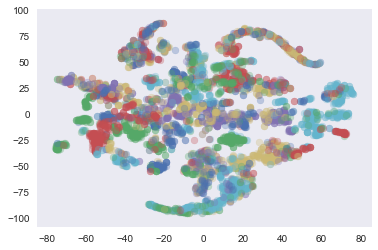

In [16]:
# plot each aisle in a different colour

for f in np.unique(foods['FoodAisle']):
    plt.scatter(Y2[foods['FoodAisle']==f,0],Y2[foods['FoodAisle']==f,1],alpha=.3)
plt.show()

In [17]:
find_nearest_foods(Y2,37,foods)

The nearest foodstuffs to PASTA RAVIOLI CANNED IN TOMATO SAUCE (CO2e=320.00) are:
        
1) PASTA,SPAGHETTI, CANNED IN TOMATO SAUCE
   (CO2e=120.00)        
2) ITALIAN TUNAWISTS PASTA WITH TUNA IN TOMATO SAUCE
   (CO2e=329.00)        
3) PACKET MIX WINE GRAVY EG C&B'S MADEIRA MADE UP
   (CO2e=320.00)        
4) SOYA ALTERNATIVE TO MILK UNSWEETENED
   (CO2e=70.00)        
 ...


In [18]:
find_nearest_foods(Y2,1500,foods)

The nearest foodstuffs to CHERRIES COOKING STEWED WITHOUT SUGAR WEIGHED WITH STONES (CO2e=120.00) are:
        
1) CHERRIES COOKING RAW WEIGHED WITH STONES
   (CO2e=120.00)        
2) CHERRIES EATING RAW WEIGHED WITH STONES
   (CO2e=120.00)        
3) CHERRIES COOKING STEWED WITHOUT SUGAR NO STONES
   (CO2e=120.00)        
4) CHERRIES EATING RAW NO STONES
   (CO2e=120.00)        
 ...


In [19]:
find_nearest_foods(Y2,700,foods)

The nearest foodstuffs to CHICK CASS LIGHT AND DARK MEAT ONLY (CO2e=420.00) are:
        
1) TURKEY DRUM ROAST MEAT & SKIN BONE NOT WT
   (CO2e=420.00)        
2) CHICKEN DRUMSTICKS ROAST MEAT & SKIN NO BONE
   (CO2e=350.00)        
3) CHICKEN BREAST CASSEROLED  MEAT & SKIN NO BONES
   (CO2e=580.00)        
4) CHICKEN PORTION WITH  SKIN UNCOATED/ FLOUR ONLY DEEP FRIED  BLENDED VEG OIL INCL T/W
   (CO2e=420.00)        
 ...
